In [1]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import nltk
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
kot_df = pd.read_csv('kotkin_comments.csv')
sto_df = pd.read_csv('stone_comments.csv')
import functools as f
from wordcloud import WordCloud

In [2]:
kot_df.rename({'0':'comments'}, axis=1, inplace=True)
kot_df.drop('Unnamed: 0', axis = 1)

,comments
0,Here are the timestamps. Please check out our ...
1,I think this complement could be taken the wro...
2,It took me 11 hours to do the math but he said...
3,I love Stephen Kotkin. One of my fav historian...
4,This interview was a certified classic!
...,...
1394,"Can we get a count how many times he said ""Lex""?"
1395,"Lex, may all the love, luck, strength be with ..."
1396,3.30 magnificent observations how France ...
1397,All that study. And all you get is a propagand...


In [3]:
sto_df.rename({'0':'comments'}, axis=1, inplace = True)


In [4]:
kot_df.head()

,Unnamed: 0,comments
0,0,Here are the timestamps. Please check out our ...
1,1,I think this complement could be taken the wro...
2,2,It took me 11 hours to do the math but he said...
3,3,I love Stephen Kotkin. One of my fav historian...
4,4,This interview was a certified classic!


In [5]:
#Data exploration and high level data analysis

In [6]:
kot_df = kot_df.applymap(str)
sto_df = sto_df.applymap(str)

In [7]:
kot_df.dtypes

Unnamed: 0    object
comments      object
dtype: object

In [8]:
#Creating polarity and subjectivity columns
kot_df['polarity'] = kot_df['comments'].apply(lambda x: TextBlob(str(x)).sentiment[0])
kot_df['subjectivity'] = kot_df['comments'].apply(lambda x: TextBlob(str(x)).sentiment[1])
sto_df['polarity'] = sto_df['comments'].apply(lambda x: TextBlob(str(x)).sentiment[0])
sto_df['subjectivity'] = sto_df['comments'].apply(lambda x: TextBlob(str(x)).sentiment[1])

#Creating a length column
kot_df['comm_length'] = kot_df['comments'].apply(lambda x: len(x))
sto_df['comm_length'] = sto_df['comments'].apply(lambda x: len(x))

In [9]:
sto_df[sto_df['polarity']>=0.5]

,Unnamed: 0,comments,polarity,subjectivity,comm_length
6,6,"Thank you Lex, great episode as always.",0.8000,0.750,39
8,8,I am honestly disturbed buy this level of spin...,0.7000,0.825,102
9,9,"This was very interesting to listen to, thank ...",0.8125,0.650,50
15,15,You are truly a great person Lex,0.8000,0.750,32
17,17,"This was brilliant. Thanks, Lex",0.5500,0.600,31
...,...,...,...,...,...
835,835,Its really interesting how Stone repeatedly sp...,0.5000,0.500,229
859,859,Oliver paints Putin as a great sensible person...,0.7500,0.825,161
867,867,Oliver Stone must be living in his own world a...,0.6000,1.000,76
889,889,After him saying that Putins idea is to keep w...,0.6000,0.900,122


C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


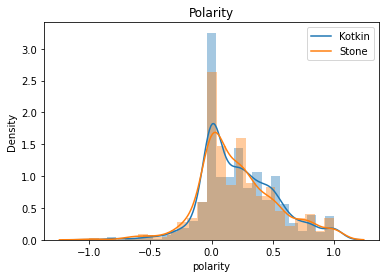

In [45]:
sns.distplot(kot_df['polarity'])
sns.distplot(sto_df['polarity']).set(title = "Polarity")
plt.legend(labels=["Kotkin", "Stone"])

C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


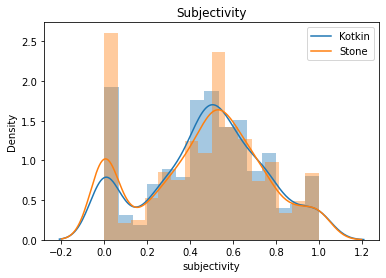

In [46]:
sns.distplot(sto_df['subjectivity'])
sns.distplot(kot_df['subjectivity']).set(title = "Subjectivity")
plt.legend(labels=["Kotkin", "Stone"])

In [12]:
#The distribution are fairly similar

In [13]:
print('Stone number of comments:',len(sto_df))
print('Kotkin number of comments:',len(kot_df))

Stone number of comments: 895
Kotkin number of comments: 1399


In [14]:
kot_df[kot_df['Unnamed: 0']==1388].comments

Series([], Name: comments, dtype: object)

In [15]:
def label_assig(val): 
    if val == 0: 
        return 'neutral'
    elif val < 0: 
        return 'neg'
    elif val > 0: 
        return 'pos'
kot_df['label'] = kot_df['polarity'].apply(label_assig)
sto_df['label'] = sto_df['polarity'].apply(label_assig)

In [16]:
sto_df.head()

,Unnamed: 0,comments,polarity,subjectivity,comm_length,label
0,0,Here are the timestamps. Please check out our ...,0.085714,0.557143,897,pos
1,1,“When exposing a crime is treated as committin...,0.000000,0.000000,109,neutral
2,2,I never felt inclined to and never bothered le...,0.342857,0.721429,446,pos
3,3,"Oliver Stone, please protect the man for the f...",0.158333,0.375000,135,pos
4,4,This is an outstanding interview such nice dia...,0.431714,0.842143,108,pos


In [17]:
#Let's put the two datasets togheter, and plot them out
kot_df['video'] = 'Kotkin'
sto_df['video'] = 'Stone'
df = pd.concat([kot_df, sto_df],axis=0).reset_index()

In [18]:
df.head()

,index,Unnamed: 0,comments,polarity,subjectivity,comm_length,label,video
0,0,0,Here are the timestamps. Please check out our ...,0.216667,0.377778,781,pos,Kotkin
1,1,1,I think this complement could be taken the wro...,0.242857,0.714286,268,pos,Kotkin
2,2,2,It took me 11 hours to do the math but he said...,0.187500,0.437500,88,pos,Kotkin
3,3,3,I love Stephen Kotkin. One of my fav historian...,0.300000,0.500000,85,pos,Kotkin
4,4,4,This interview was a certified classic!,0.208333,0.166667,39,pos,Kotkin


<AxesSubplot:xlabel='label', ylabel='count'>

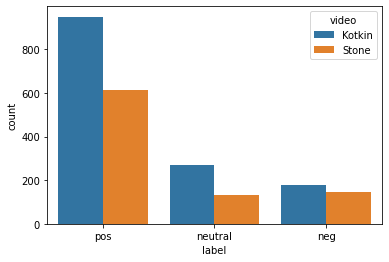

In [19]:
sns.countplot(data=df, x='label', hue='video')

count    2294.000000
mean      219.687881
std       426.049392
min         3.000000
25%        60.000000
50%       114.000000
75%       222.000000
max      8667.000000
Name: comm_length, dtype: float64


C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='comm_length', ylabel='Density'>

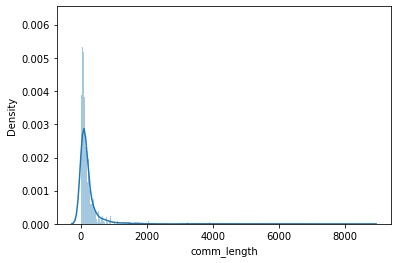

In [20]:
print(df['comm_length'].apply(float).describe())
sns.distplot(df['comm_length'], bins = 1000)

[Text(0.5, 1.0, 'Polarity in relation to column length')]

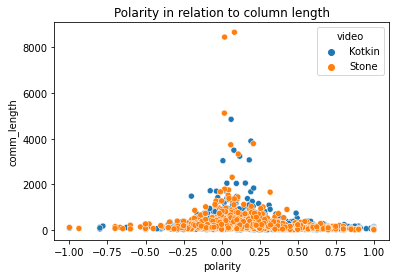

In [21]:
sns.scatterplot(data=df,
                x='polarity',
                y='comm_length', 
                hue='video').set(title = "Polarity in relation to column length")
#We see that the longer the comment, the more it's around the zero mark, or neutrality

[Text(0.5, 1.0, 'Subjectivity in relation to column length')]

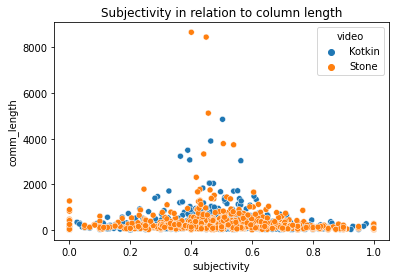

In [22]:
sns.scatterplot(data=df, x='subjectivity', y='comm_length', hue = 'video').set(title = "Subjectivity in relation to column length")
#Same interpretation here, the longer the comment, the more it turns around the neutrality point

In [23]:
#We see there is less positive sentiment in the Stone video, people seem to disagree with his views/takes
#Let's create a table to see proportion of positive vs negative vs neutral. 

In [24]:
len_kot = len(df[df['video']=='Kotkin'])
len_sto = len(df[df['video']=='Stone'])
prop_neg_kot = round(len(df.loc[(df['video']=='Kotkin') & (df['label']=='neg')])/len_kot, 4)*100
prop_pos_kot = round(len(df.loc[(df['video']=='Kotkin') & (df['label']=='pos')])/len_kot,4 )*100
prop_neu_kot = round(len(df.loc[(df['video']=='Kotkin') & (df['label']=='neutral')])/len_kot,4 )*100
prop_neg_sto = round(len(df.loc[(df['video']=='Stone') & (df['label']=='neg')])/len_sto, 4)*100
prop_pos_sto = round(len(df.loc[(df['video']=='Stone') & (df['label']=='pos')])/len_sto, 4)*100
prop_neu_sto = round(len(df.loc[(df['video']=='Stone') & (df['label']=='neutral')])/len_kot, 4)*100

In [25]:
Kotkin = [prop_neg_kot, prop_pos_kot, prop_neu_kot]
Stone = [prop_neg_sto, prop_pos_sto, prop_neu_kot]
index = ['Negative', 'Positive', 'Neutral']
cols = ['Kotkin','Stone','Sentiment polarity']
list_of_tuples = list(zip(Kotkin, Stone, index))

In [26]:
proportion = pd.DataFrame(list_of_tuples, columns=cols)

In [27]:
proportion.set_index('Sentiment polarity', inplace=True)

Sentiment polarity distribution in the dataset (in %)

In [28]:
proportion

,Kotkin,Stone
Sentiment polarity,,
Negative,12.72,16.42
Positive,67.91,68.72
Neutral,19.37,19.37


The proportions are similar, percentage wise

In [29]:
#Preprocessing the data
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams

In [30]:
lemmatizer = WordNetLemmatizer()
#Function to vectorize and lemmatize the data
def text_process(mess):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    #Vectorize the data
    # Now just remove any stopwords
    stop = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

    #Lemmatize data
    lemma = []
    for lem in stop: 
        lemma.append(lemmatizer.lemmatize(lem, pos = 'v'))
    return lemma

text_process('Hello World, I am working on an NLP project')

['Hello', 'World', 'work', 'NLP', 'project']

In [31]:
df = df.applymap(str)

In [32]:
df['pro_comments'] = df.comments.apply(text_process)

In [33]:
df.head()

,index,Unnamed: 0,comments,polarity,subjectivity,comm_length,label,video,pro_comments
0,0,0,Here are the timestamps. Please check out our ...,0.21666666666666667,0.37777777777777777,781,pos,Kotkin,"[timestamps, Please, check, sponsor, support, ..."
1,1,1,I think this complement could be taken the wro...,0.24285714285714288,0.7142857142857143,268,pos,Kotkin,"[think, complement, could, take, wrong, way, i..."
2,2,2,It took me 11 hours to do the math but he said...,0.1875,0.4375,88,pos,Kotkin,"[take, 11, hours, math, say, “Lex”, guest, com..."
3,3,3,I love Stephen Kotkin. One of my fav historian...,0.3,0.5,85,pos,Kotkin,"[love, Stephen, Kotkin, One, fav, historians, ..."
4,4,4,This interview was a certified classic!,0.20833333333333331,0.16666666666666666,39,pos,Kotkin,"[interview, certify, classic]"


In [34]:
#See the most associated words
#Creating one string for each videos comments
kot_words = []
sto_words = []
for i in range(len(df)):
    if df['video'][i] =='Kotkin':
        kot_words += df['pro_comments'][i]
    else: 
        sto_words += df['pro_comments'][i]


In [35]:
#Function used to create a custom ngram to group words in n-size groups
def ngramconv(sentence,n):
    num = []
    ngram_sentence = ngrams(sentence, n)
    for item in ngram_sentence:
        num.append(item)
    return num

Kotkin comment analysis

Kotkin visuals: 
Wordcloud


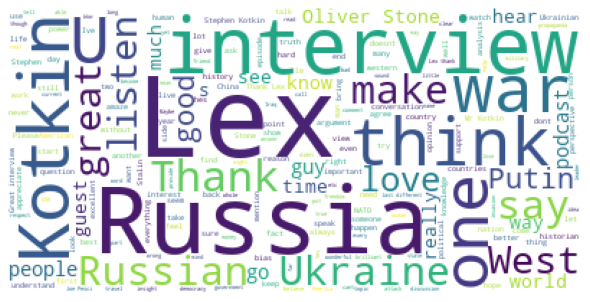

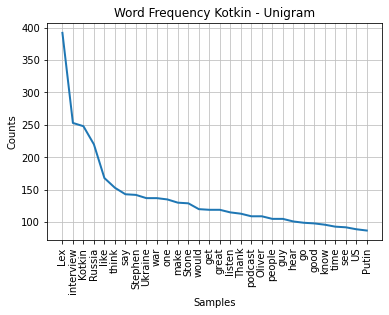

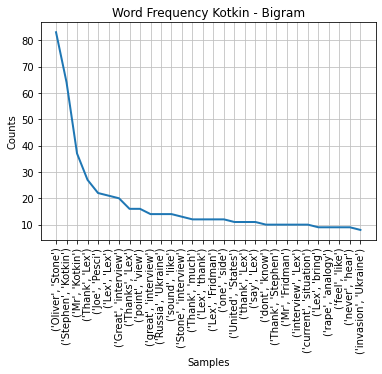

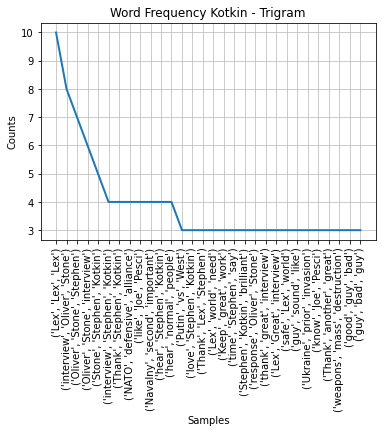

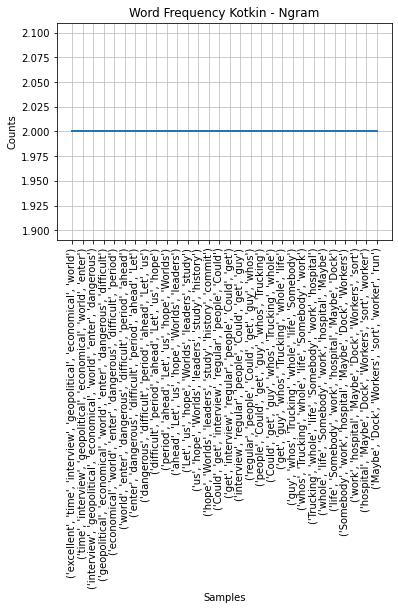

In [36]:
#For Kotkin
print("Kotkin visuals: ")
print("Wordcloud")

#Create one string with all the words used in the comments
words_for_cloud_kot = f.reduce(lambda x, y: x + ' ' + y, kot_words)

#Generate wordcloud
wordcloud = WordCloud(background_color = 'white').generate(words_for_cloud_kot)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#Frequency of kotkin words
nlp_words_Kotkin = nltk.FreqDist(kot_words)

#Create unigram, bigram and trigram
plot1 = nlp_words_Kotkin.plot(30, title='Word Frequency Kotkin - Unigram')
bi_kot = list(nltk.bigrams(kot_words))
nlp_words_Kotkin_bi = nltk.FreqDist(bi_kot)
plot_bi = nlp_words_Kotkin_bi.plot(30, title='Word Frequency Kotkin - Bigram')
tri_kot = list(nltk.trigrams(kot_words))
nlp_words_Kotkin_tri = nltk.FreqDist(tri_kot)
plot_tri = nlp_words_Kotkin_tri.plot(30, title='Word Frequency Kotkin - Trigram')

#Let's create a n gram where n = 6
n_kot = ngramconv(kot_words, 6)
nlp_words_Kotkin_n = nltk.FreqDist(n_kot)
plot_n = nlp_words_Kotkin_n.plot(30, title='Word Frequency Kotkin - Ngram')


Stone comment analysis

Stone visuals
Wordcloud


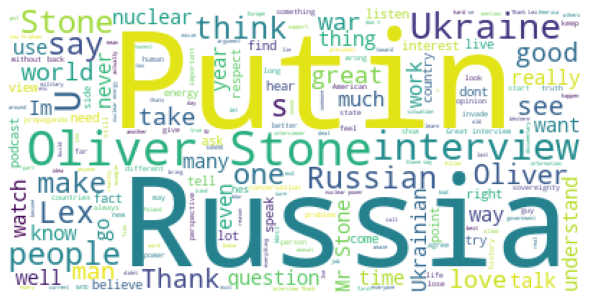

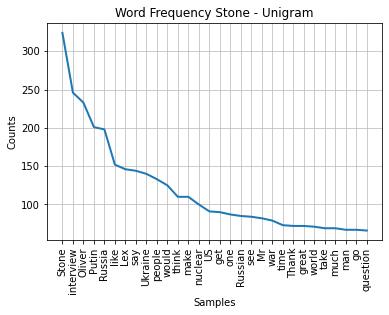

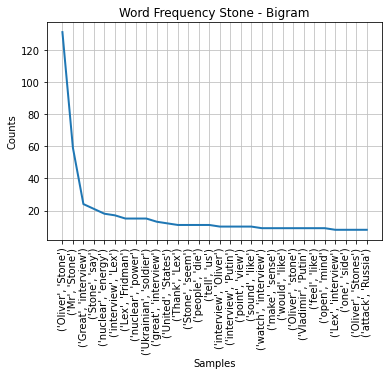

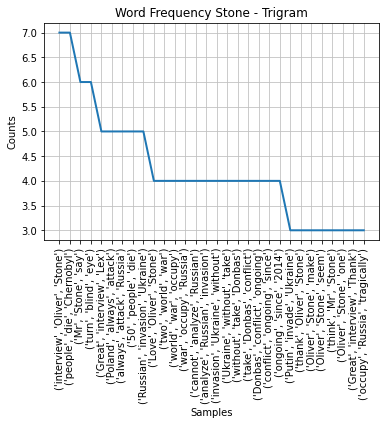

<FreqDist with 21579 samples and 21926 outcomes>


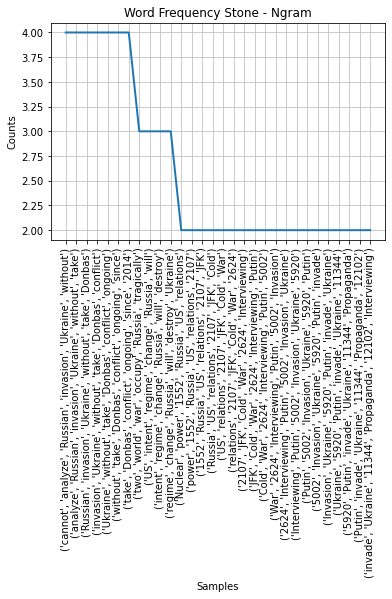

In [37]:
#For Stone
print("Stone visuals")
#Wordcloud for Stone
print("Wordcloud")
words_for_cloud_sto = f.reduce(lambda x, y: x + ' ' + y, sto_words)
wordcloud = WordCloud(background_color = 'white').generate(words_for_cloud_sto)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#Unigram
nlp_words_Stone = nltk.FreqDist(sto_words)
plot2 = nlp_words_Stone.plot(30, title='Word Frequency Stone - Unigram')

#Bigram
bi_sto = list(nltk.bigrams(sto_words))
nlp_words_Stone_bi = nltk.FreqDist(bi_sto)
plot_bi = nlp_words_Stone_bi.plot(30, title='Word Frequency Stone - Bigram')

#Trigram
tri_sto = list(nltk.trigrams(sto_words))
nlp_words_Stone_tri = nltk.FreqDist(tri_sto)
plot_bi = nlp_words_Stone_tri.plot(30, title='Word Frequency Stone - Trigram')

#Ngram
n_sto= ngramconv(sto_words, 6)
nlp_words_Stone_n = nltk.FreqDist(n_sto)
print(nlp_words_Stone_n)
plot_n = nlp_words_Stone_n.plot(30, title='Word Frequency Stone - Ngram')

Kotkin: 
    First off, by looking at the wordcloud, we can see that Russia, Ukraine, West have been mentionned in the comment the most often. That correlates to the fact that Kotkin was speaking about influence groups and regions, rather than individuals. This was also the case as we can see in the comments. 

    Second off, the bi, tri, and n-grams don't tell us much about the issue itself. They seem to turn around the appreciation of the interview, and respond to Oliver Stone's interview. 

Stone: 
    First off, in comparison to the Kotkin wordcloud, we see that the comments are centered around Putin as an individual. In the same fashion as the Kotkin video, this correlates to the fact that Putin is discussed throughout the whole interview. 

    Second off, the tri-gram visual is interesting as Stone defended nuclear energy. The most frequent tri-gram looks like a response (and perhaps disagreement) to his take on nuclear energy. This is a surprising finding as this topic wasn't covered for long, and didn't seem as relevant than the discussion of the war in Ukraine.

In [38]:
#Let's create a Bag of Words
import gensim
from gensim import corpora

In [39]:
dictionary = gensim.corpora.Dictionary(df['pro_comments'])
bow_corpus = [dictionary.doc2bow(doc) for doc in df['pro_comments']]

Let's run a Latent Dirichlet Model to extract the main topics from the processed comments. This topic modelling algorithm is used to 

In [40]:
#Running the LDA model
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 2, 
                                   id2word = dictionary,                                    
                                   passes = 100,
                                   workers = 2)

In [41]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.004*"war" + 0.004*"get" + 0.004*"Putin" + 0.003*"guy" + 0.003*"Russian" + 0.003*"people" + 0.003*"make" + 0.003*"nuclear" + 0.003*"Russia" + 0.003*"use"
Topic: 1 
Words: 0.013*"Lex" + 0.011*"interview" + 0.011*"Stone" + 0.009*"Russia" + 0.008*"Oliver" + 0.007*"like" + 0.006*"say" + 0.006*"think" + 0.006*"Ukraine" + 0.006*"Putin"


As seen above, we can infer 2 topics: 
Topic 1: 
    The first topic seems to be about the threat of nuclear war, and it's impact on people. This makes sense as the main global concern with
    people who are not directly involved in the conflict, is nuclear war. 
Topic 2: 
    The second topic seems to be more centered around the interview itself.